# Part II - Investigating the Relationships between Variables in the Prosper Loan Data
## by Zadock Mainda

## Investigation Overview


> Describe the overall goals of your presentation here. Add a summary of key insights at the start of the notebook, just as you added in the README.md. This will help your notebook to stay aligned to the key insights you want to include in your slide deck.

> **Rubric Tip**: The key insights in the slideshow must match those documented in the README.md summary. 


## Dataset Overview

> The Prosper Loan Data contains a wide range of information that not only describes the borrowers'  General details and loan specifics but also Estimated Loan yield among many others. These details are spread over 81 separate columns for the 113,937 loans taken at the credit facility between Nov 2005 and Mar 2014. Even though most of these variables apply to all laons between 2005 and 2014, there are some that applicable to certain period only. For instance, The prosperScore and ProsperRating are assigned to loan listings that were created after July 2009. 

In [23]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime


%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [21]:
# load in the dataset into a pandas dataframe
loan_clean = pd.read_csv('loan_clean.csv')

In [25]:
#Suppoorting base code
#Sort the categorical variables
# temp list to hold ordered items
# change datatype to category


sorted_credits = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC']
loan_clean['CreditGrade'] = pd.Categorical(loan_clean['CreditGrade'], sorted_credits, ordered=True)

#Create a month column and change datatype to categorical
loan_clean['month'] = pd.to_datetime(loan_clean['ListingCreationDate']).dt.strftime('%b')
#month names
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
loan_clean['month'] = pd.Categorical(loan_clean['month'], categories=months, ordered=True)


#Function to plot vertical bar chart
#Slight modification to function to plot against x axis

def vertical_bar(colname):
    output_bar = sb.countplot(x=loan_clean[colname], color=sb.color_palette()[4])
    for bar in output_bar.containers:
        output_bar.bar_label(bar)
    return output_bar

#Function to assist with plotting loan_clean barcharts 

def draw_bar(colname):
    output_bar = sb.countplot(y=loan_clean[colname], color=sb.color_palette()[4])
    for bar in output_bar.containers:
        output_bar.bar_label(bar)
    return output_bar

#select a random sample of 1,000 rows 
np.random.seed(1)
loan_sampled = loan_clean.sample(1000)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## How are credit ratings distributed through the dataset?

> Most of the borrowers in this dataset have a C level credit rating. This is crucial information to assist stakeholder's pinpoint the credit garde of the most borrowers and perhaps commission further exploration into their loan repayment rates. 


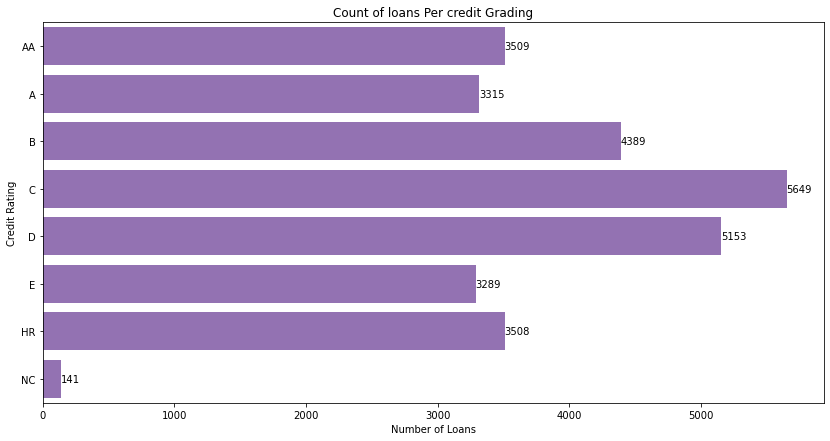

In [13]:
# plot bar chart

plt.figure(figsize = (14,7))

draw_bar('CreditGrade')

plt.xlabel('Number of Loans')
plt.ylabel('Credit Rating')
plt.title('Count of loans Per credit Grading');

## Which is the most common Month for borrowers to take loans?

> From our listCreationDate Barchart, the highest number of loans were listed in Jan while the least number of loans was listed in April. There is a continuous downward trend from Jan that ended in April. And then from April We have a clear upwards trend for the second quarter upto July before the number of dips slightly before picking another upwards trend until the last month.

''

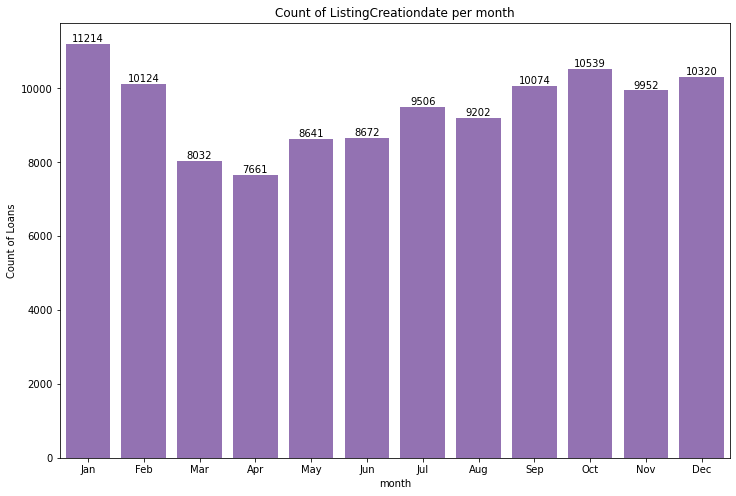

In [19]:
# Plot bar chart

plt.figure(figsize = (12,8))

vertical_bar('month')
plt.ylabel('Count of Loans')
plt.title('Count of ListingCreationdate per month')
;

## What's the relationship between  DebtToIncomeRatio and BorrowerRate variables?
> There is a weak but positive relationship between the DebtToIncomeRatio and BorrowerRate variables. As the BorrowerRate increases, DebtToIncomeRatio tends to increase also.


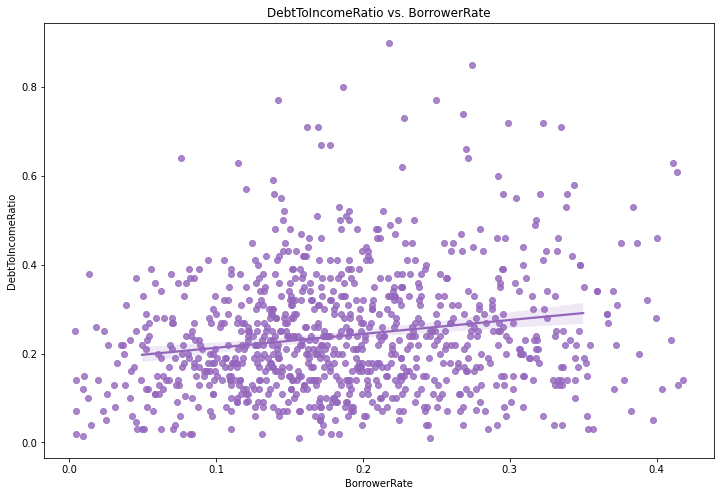

In [27]:
# Limit the Y axis plot to between 0 and 1 where most of the data points lie

plt.figure(figsize=(12,8))
plt.title('DebtToIncomeRatio vs. BorrowerRate')
sb.regplot(data=loan_sampled[loan_sampled.DebtToIncomeRatio <= 1], 
           x='BorrowerRate', y='DebtToIncomeRatio',
           x_jitter=0.07, color=sb.color_palette()[4]
          );

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 